In [1]:
import cluster
from cluster_sim import ClusterSimulation
import matplotlib.pyplot as plt


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from hon import HON
from properties import *


In [3]:
Li_properties = Lithium()

In [107]:
T = 850

C_sat2 = Li_properties.solubility_tritium(T, correlation="Smith1979")

C_sat = np.exp(-6.558 +(6005/T))*ureg("1/atm^0.5")
C_sat

1.6598145551333967 <Unit('1 / standard_atmosphere ** 0.5')>

In [108]:
C_sat2.to("atm**0.5")

c2 = 1/C_sat2.to("atm**0.5")

In [109]:
M = 6.941*ureg("g/mol")
density = Li_properties.density(T)
P = 1*ureg("atm")
c =C_sat/M*density
#c = c*1*ureg("atm")**0.5


In [110]:
M = 6.941*ureg("g/mol")
density = Li_properties.density(T)
P = 1*ureg("atm")
c2 =c2/M*density

In [111]:
c2.to("mole/meter**3/Pa**0.5")

232.21511748769692 <Unit('mole / meter ** 3 / pascal ** 0.5')>

In [112]:
c.to("mole/meter**3/Pa**0.5")


358.29543988379345 <Unit('mole / meter ** 3 / pascal ** 0.5')>

In [113]:
import math

def calcular_presion_parcial_hidrogeno(fraccion_masica_h, masa_molar_h, masa_molar_li):
    # Convertir la fracción másica a fracción molar
    fraccion_molar_h = (fraccion_masica_h / masa_molar_h) / ((fraccion_masica_h / masa_molar_h) + ((1 - fraccion_masica_h) / masa_molar_li))
    # Presión total en atmósferas (ajustar si es diferente)
    presion_total = 1.0
    # Calcular la presión parcial del hidrógeno
    presion_parcial_h = (fraccion_molar_h * presion_total)*ureg("atm")
    return presion_parcial_h

def calcular_concentracion_equilibrio(solubilidad, presion_parcial_h):
    # Aplicar la ley de Sieverts
    concentracion_equilibrio = solubilidad * presion_parcial_h**0.5
    return concentracion_equilibrio.to("mol/m**3")

# Entrada de datos
solubilidad = c2
fraccion_masica_h = 0.00000001
masa_molar_h = 7.94  # g/mol
masa_molar_li = 6.94  # g/mol

# Calcular la presión parcial del hidrógeno
presion_parcial_h = calcular_presion_parcial_hidrogeno(fraccion_masica_h, masa_molar_h, masa_molar_li)

# Calcular la concentración de equilibrio
concentracion_equilibrio = calcular_concentracion_equilibrio(solubilidad, presion_parcial_h)

print(f"La concentración de equilibrio del hidrógeno en el litio es: {concentracion_equilibrio*masa_molar_h*ureg('g/mol')}")


La concentración de equilibrio del hidrógeno en el litio es: 54.870482903327805 gram / meter ** 3


In [117]:
concentracion_eq_g= concentracion_equilibrio/Li_properties.density(T).to('g/m**3')

ratio = concentracion_eq_g*masa_molar_li*ureg("g/mol")

real_frac = ratio/(1+ratio)
real_frac


0.00010054767161876669 <Unit('dimensionless')>

In [44]:
radius = (20*1e-4)*ureg("centimeter")
density_target = 500*ureg("g/centimeter**3")

volum_target = 4/3*np.pi*radius**3
mass_T = volum_target*density_target*0.5
molar_mass = 3.1016*ureg("gram/mol")
moles_T = mass_T/molar_mass
atoms_T = moles_T*6.022e23
atoms_T*1.53
moles_T

2.7010512024673658e-06 <Unit('mole')>

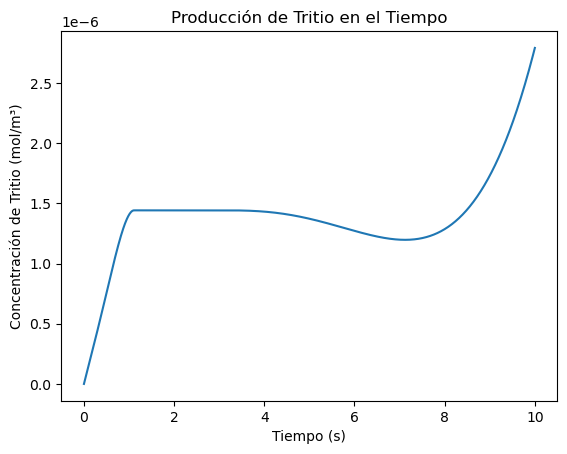

In [46]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parámetros del modelo
TBR = 1.53  # Tritium Breeding Ratio
masa_tritio_por_pulso = 8.377580409572781e-6  # g
masa_molar_tritio = 3.016  # g/mol
volumen_reactor = 1.0  # m³ (ajustar según el volumen real del reactor)
intervalo_pulso = 10.0  # segundos (ajustar según la frecuencia real de los pulsos)

# Convertir masa a moles y luego a concentración (mol/m³)
moles_tritio_por_pulso = masa_tritio_por_pulso / masa_molar_tritio
concentracion_inicial_por_pulso = moles_tritio_por_pulso / volumen_reactor

# Ecuación diferencial del modelo
def modelo_tritio(t, C):
    if int(t) % intervalo_pulso == 0:
        # Aumentar la concentración debido a la producción y disminuir por el consumo
        return (TBR - 1) * concentracion_inicial_por_pulso
    else:
        # No hay cambio en la concentración entre pulsos
        return 0

# Tiempo de simulación
t_span = (0, 10)  # De 0 a 10 segundos
t_eval = np.linspace(t_span[0], t_span[1], 1000)  # 1000 puntos en el intervalo

# Resolviendo la ecuación diferencial
solucion = solve_ivp(modelo_tritio, t_span, [0], t_eval=t_eval)

# Graficando los resultados
plt.plot(solucion.t, solucion.y[0])
plt.xlabel('Tiempo (s)')
plt.ylabel('Concentración de Tritio (mol/m³)')
plt.title('Producción de Tritio en el Tiempo')
plt.show()


In [35]:
Fusion_power = 10*ureg("gigajoules")
DT_energy = 14.1*ureg("MeV")
DT_energy = DT_energy.to("gigajoule")
TBR = 1.53
molar_mass = 7.95*ureg("gram/mol")
number_fusions = Fusion_power/(0.5*DT_energy)
number_particles = number_fusions
number_particles_produced = number_fusions*TBR
number_moles_produced = number_particles_produced/6.022e23
number_moles_produced

0.02249319606814015 <Unit('dimensionless')>

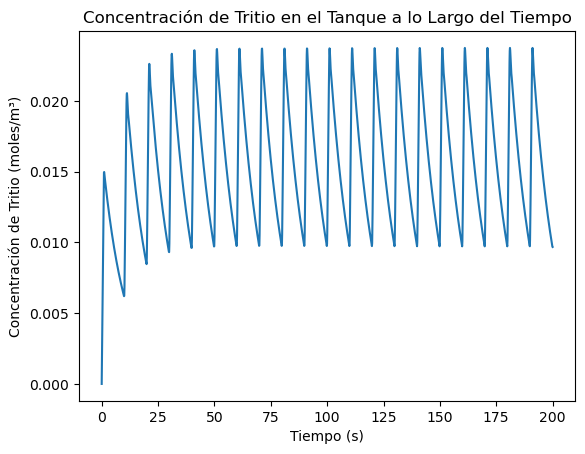

In [58]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parámetros del modelo
TBR = 1.53  # Tritium Breeding Ratio
neutrones_por_segundo = 6.196891455977724e+21  # Tasa de neutrones producidos por segundo
numero_de_Avogadro = 6.022e23
fraccion_recirculacion = 0.9  # Fracción del caudal de salida que se recircula
Q_out = 1  # Caudal de salida (m³/s)
V = 1  # Volumen del tanque (m³)
intervalo_pulso = 10.0  # Intervalo de tiempo entre pulsos (s)

# Tasa de producción de tritio en moles por segundo
tasa_produccion_T_mol_por_segundo = (TBR * neutrones_por_segundo) / numero_de_Avogadro

# Ecuación diferencial del modelo
def modelo_tanque(t, C):
    Q_in = fraccion_recirculacion * Q_out  # Caudal de entrada es una fracción del de salida
    C_in = C  # La concentración de entrada es igual a la de salida
    if int(t) % intervalo_pulso == 0:
        r = tasa_produccion_T_mol_por_segundo
    else:
        r = 0
    return (Q_in * C_in - Q_out * C) / V + r

# Tiempo de simulación
t_span = (0, 200)  # Simular por un periodo más largo para ver el efecto acumulativo
t_eval = np.linspace(t_span[0], t_span[1], 2000)

# Resolviendo la ecuación diferencial
solucion = solve_ivp(modelo_tanque, t_span, [0], t_eval=t_eval, method='RK45', max_step=1)

# Graficando los resultados
plt.plot(solucion.t, solucion.y[0])
plt.xlabel('Tiempo (s)')
plt.ylabel('Concentración de Tritio (moles/m³)')
plt.title('Concentración de Tritio en el Tanque a lo Largo del Tiempo')
plt.show()


In [50]:
TBR = 1.53
neutrons = 6.196891455977724e+21

atoms_T_s = TBR*neutrons 
T_mol_s = atoms_T/6.022e23

T_mol_s 

0.015744343951587376

In [37]:
# M = 7.95  # Molar mass of LiH in g/mol
# LiH_rho = 0.780  # g/cm3
# volumen_molar = M/LiH_rho
# volumen_atom = volumen_molar/6.02214076e23
# print(C_sat)
# print(M/LiH_rho)
# print(volumen_atom)

# Ejemplo de uso de la clase
params = {
    'temperature': 750,
    'activation_energy': 52920.2,
    'jump_distance': 4.6e-10,
    'molar_mass': 150.05,
    'mass_density': 2.5,
    'melting_point': 1300,
    'heat_fusion': 52 * 1e3,
    'sigma': 0.15, 
}

T = 668
P0 = 1.01325e5
M = 150.05
rho = 2.5
volumen_molar = M/rho*1e-6
volumen_atom = volumen_molar/6.02214076e23
print(volumen_molar)
print(volumen_atom)

C_sat = Li_properties.solubility_tritium(T, correlation="Smith1979").magnitude
C_sat *= 133.322**0.5 #to Pa**0.5
C_sat *= 7.941 #to g
C_sat *= 1/Li_properties.density(T) #to cm3 Li
C_sat *= 1e-6
#C_satk /= (6.02214076*1e23)
S = 10.0
C_sat = 1/C_sat.magnitude
print(C_sat)


input_params = {
    "model": "classic",
    "species_atom_volume": volumen_atom,  # in m**3
    "surface_tension": 0.15,       # in N/m
    "solubility": C_sat,           # in mol/m**3/Pa
    "pressure": P0,                # in Pa
    "supersaturation_ratio": S,          # ratio of C/C_sat
    "diffusivity": 1e-4,          # in m**2/s
    "EoS": "ideal_gas"
}

c_type = "some_type"
time = "some_time"

hytrans = HON(input_params, c_type, time)

S = hytrans.S_HON(T, M)
print("Nucleation rate:", S)
print("Gibbs free energy:", hytrans.Dgvol)
print("Critical radius:", hytrans.r_c)
print("Critical number of atoms:", hytrans.n_c)
print("Critical Gibbs free energy:", hytrans.DG_c.to("joules"))


6.002e-05
9.966555481177427e-29
1075.791781026455
Nucleation rate: 0.0 / meter ** 3 / second
Gibbs free energy: -2.1235379182309032e-20 joule
Critical radius: 1.4080118931166237e-09 meter
Critical number of atoms: 117.31325272323035 dimensionless
Critical Gibbs free energy: 1.245639910796345e-18 joule


(-100.0, 150.0)

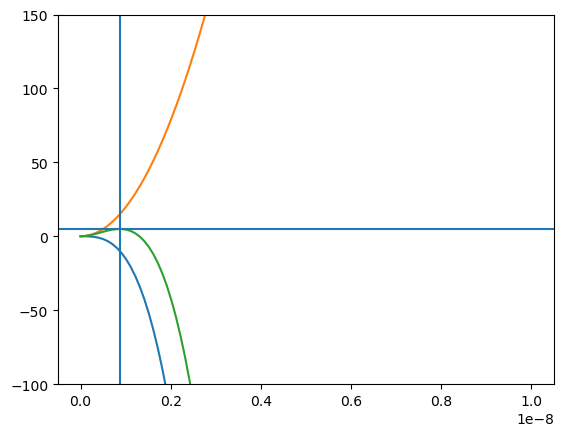

In [16]:
r = np.linspace(0.001*1e-10,1*1e-8,100)

plt.plot(r, (4/3)*np.pi*r**3*hytrans.Dgvol*6.242*1e18)
plt.plot(r, 4 * np.pi * r**2 * hytrans.surface_tension.magnitude*6.242*1e18)
plt.plot(r, ((4/3)*np.pi*r**3*hytrans.Dgvol.magnitude+ 4 * np.pi * r**2 * hytrans.surface_tension.magnitude)*6.242*1e18)
plt.axvline(hytrans.r_c.magnitude)
plt.axhline( hytrans.DG_c.to("joules").magnitude*6.242*1e18)
#plt.xlim(0,1*1e-9)
plt.ylim(-100,150)


In [1]:
from cluster_physics import *
import cluster
from cluster_sim import ClusterSimulation
import matplotlib.pyplot as plt

In [2]:
# Ejemplo de uso de la clase
params = {
    'temperature': 750,
    'activation_energy': 52920.2,
    'jump_distance': 4.6e-10,
    'molar_mass': 150.05,
    'mass_density': 2.5,
    'melting_point': 1300,
    'heat_fusion': 52 * 1e3,
    'supersaturation_ratio': 20.5,
    'sigma': 0.15, 
    'method': 'melting'
}

cluster_physics = ClusterPhysics(params)

In [3]:
cluster_physics.critical_number_of_molecules()

23.04237422754489 <Unit('dimensionless')>

1.053546026072275e-09


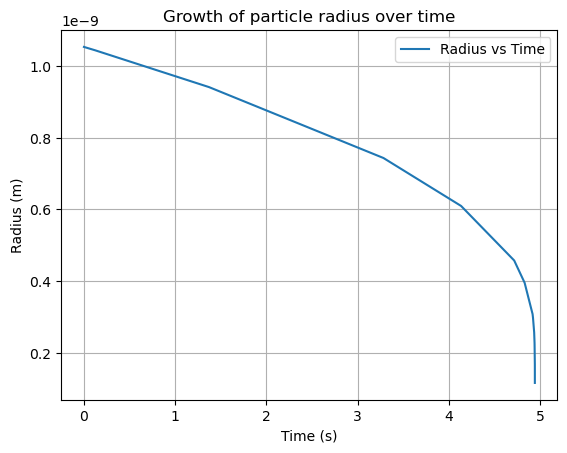

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from extensisq import BS5, SSV2stab, Pr9

# Initial conditions
r_0 = cluster_physics.critical_radius().magnitude  # Initial radius, m
print(r_0)
# Time span for the integration
t_span = (0, 3600)  # e.g., 1 hour

# Solve the differential equation using solve_ivp
sol = solve_ivp(
    cluster_physics.dr_dt, 
    t_span, 
    [r_0], 
    #args=(D, lambda_, V, k_B, T, sigma_a, S),
    method = SSV2stab,
    rtol=1e-10,
    atol=1e-10,

    #dense_output=True
)

# Plotting the solution
plt.plot(sol.t, sol.y[0], label='Radius vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Radius (m)')
plt.title('Growth of particle radius over time')
plt.legend()

plt.grid(True)
plt.show()


In [5]:
cluster_physics.print_properties()

Constante de Boltzmann: 1.3806e-23 joule / kelvin
Constante de los gases: 8.314 joule / kelvin / mole
Temperatura: 750 kelvin
Energía de activación: 52920.2 kelvin
Distancia de salto: 4.6e-10 meter
Masa molar: 150.05 gram / mole
Densidad: 2.5 gram / centimeter ** 3
Punto de fusión: 1300 kelvin
Calor de fusión: 52000.0 joule / mole
Entropía de fusión: 40.0 joule / kelvin / mole
Volumen molar: 6.002000000000001e-05 meter ** 3 / mole
Volumen molecular: 9.966555249479468e-29 meter ** 3
Sigma: 0.15 joule / meter ** 2


/home/alexandre_sureda/miniconda3/envs/neutronics/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


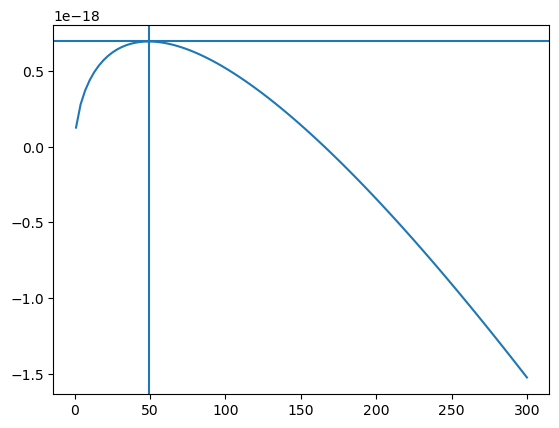

In [15]:
import matplotlib.pyplot as plt
plt.figure()
n = np.linspace(1,300,100)
plt.plot(n,cluster_physics.total_free_energy(n))
plt.axvline(cluster_physics.critical_number_of_molecules())
plt.axhline(cluster_physics.critical_energy_barrier().magnitude)


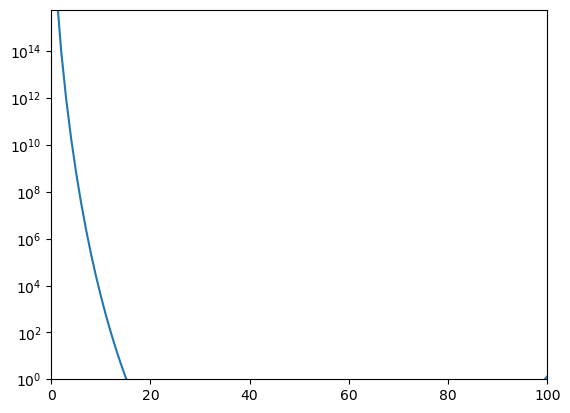

In [16]:
import matplotlib.pyplot as plt
plt.figure()
n = np.linspace(1,100,100)
plt.plot(n,1e-6*cluster_physics.number_density_equilibrium(n))
#plt.axvline(cluster_physics.critical_number_of_molecules_saturation())
#plt.axvline(cluster_physics.critical_number_of_molecules_melting())
plt.xlim(0,100)
plt.ylim(1,6e15)
plt.yscale("log")
#plt.axhline(cluster_physics.critical_energy_barrier_saturation().magnitude)
#plt.axhline(cluster_physics.critical_energy_barrier_melting().magnitude)

In [2]:
rho = 0.515-1.01e-4*((650-273.15)-200)

In [28]:
# Ejemplo de valores
ppm = 1  # 100 ppm
masa_molar_soluto = 56.0  # Masa molar del soluto en g/mol (ejemplo: NaCl)
masa_molar_solvente = 6.98  # Masa molar del solvente en g/mol (ejemplo: agua)

# Convertir ppm a fracción en peso
fraccion_peso = ppm / 1e6

# Calcular la fracción molar
fraccion_molar = (fraccion_peso * masa_molar_solvente) / (masa_molar_soluto + fraccion_peso * (masa_molar_solvente - masa_molar_soluto))

print("Fracción Molar:", 1 -fraccion_molar)

Fracción Molar: 0.9999998753570337


In [16]:
# input
M_Li=349015.42 # kg Li mass in the entire circuit 
M_Li_discharge= 142614.66 # kg  in 1 pulse
Density_Li= 497.1385 # kg/m3
Molar_mass_Li= 6.941 # g/mol
V_Li_discharge= M_Li_discharge/Density_Li # m3 
Pulse_period=90 # s
M_impurities= 135000 # kg Mass of impurities produced in 1 year of operation 
Operation_time= 8000*3600 # s in 1 year 
X_Fe=0.8 # M_Fe/M_total_impurities
X_Cr=0.1 
X_AlN=0.1

In [17]:

Number_of_pulses=  Operation_time/Pulse_period # number of pulses in 1 year of operation 
M_impurities_per_period=M_impurities/Number_of_pulses # Impurities mass produce in 1 period 

print("number of pulses in 1 year of operation: ",Number_of_pulses)
print("Impurities mass produced in 1 period in the entire circuit : ",M_impurities_per_period," kg" )


number of pulses in 1 year of operation:  320000.0
Impurities mass produced in 1 period in the entire circuit :  0.421875  kg


In [18]:
MM_Fe= 55.845*1e-3 # kg/mol molar mass Fe 
MM_Cr= 51.996*1e-3
MM_AlN= 40.988*1e-3

In [24]:
M_Fe=M_impurities_per_period*X_Fe
M_Cr=M_impurities_per_period*X_Cr
M_AlN=M_impurities_per_period*X_AlN
mol_Li = (M_Li_discharge - M_impurities_per_period)/Molar_mass_Li # mol
mol_Fe=M_Fe/MM_Fe
mol_Cr=M_Cr/MM_Cr
mol_AlN=M_AlN/MM_AlN
C_Fe=M_Fe/V_Li_discharge # kg/m3
C_Cr=M_Cr/V_Li_discharge
C_AlN=M_AlN/V_Li_discharge


print("Fe_ratio mol/mol", mol_Fe/(mol_Fe+mol_Li+mol_Cr+mol_AlN),"Fe concentration: ", C_Fe,"kg/m3 ;",C_Fe/MM_Fe,"mol/m3")
print("Cr ratio mol/mol: ", mol_Cr/(mol_Fe+mol_Li+mol_Cr+mol_AlN),"Cr concentration: ",C_Cr, "kg/m3 ;", C_Cr/MM_Cr,"mol/m3")
print("AlN ratio mol/mol: ", mol_AlN/(mol_Fe+mol_Li+mol_Cr+mol_AlN),"AlN concentration: ",C_AlN, "kg/m3 ;",C_AlN/MM_AlN,"mol/m3")


Fe_ratio mol/mol 0.0002940234877874016 Fe concentration:  0.0011764866511619493 kg/m3 ; 0.021067000647541398 mol/m3
Cr ratio mol/mol:  3.947356930217575e-05 Cr concentration:  0.00014706083139524366 kg/m3 ; 0.002828310473791131 mol/m3
AlN ratio mol/mol:  5.007484408695057e-05 AlN concentration:  0.00014706083139524366 kg/m3 ; 0.00358789966320005 mol/m3


In [8]:
print("number of pulses in 1 year of operation (pilot plant): ",Number_of_pulses)
print("Impurities mass produced in 1 period in the entire circuit : ",M_impurities_per_period," kg" )

print("Fe concentration: ", C_Fe,"kg/m3 ;",C_Fe/MM_Fe,"mol/m3")
print("Cr concentration: ", C_Cr,"kg/m3 ;", C_Cr/MM_Cr,"mol/m3")
print("AlN concentration: ", C_AlN,"kg/m3 ;",C_AlN/MM_AlN,"mol/m3")

number of pulses in 1 year of operation (pilot plant):  320000.0
Impurities mass produced in 1 period in the entire circuit :  0.421875  kg
Fe concentration:  0.0011764866511619493 kg/m3 ; 0.021067000647541398 mol/m3
Cr concentration:  0.00014706083139524366 kg/m3 ; 0.002828310473791131 mol/m3
AlN concentration:  0.00014706083139524366 kg/m3 ; 0.00358789966320005 mol/m3


In [3]:
AVOGADRO = 6.022141e23
BOLTZMANN = 1.3806e-23
TEMP_INDEP_DIFFUSIVITY = 2e9
ACTIVATION_ENERGY = 4.4e5
JUMP_DISTANCE = 4.6*1e-10
CONSTANT_GAS = 8.314
import numpy as np
print('diffusivity', TEMP_INDEP_DIFFUSIVITY * np.exp(-ACTIVATION_ENERGY/(CONSTANT_GAS*750)))


diffusivity 4.524817574332084e-22


In [4]:
MAX_NUMBER_MOLECULES = 100
number_clusters_start = 2
dt = 1e-8/cluster_physics.unbiased_jump_rate().magnitude
dt = dt*1e3
time_steps = int(1e5)
T=750

In [5]:
#time_step_array = [int(1e5), int(2e5), int(3e5), int(4e5), int(5e5)]
time_step_array = [int(1e23), int(1e5)]

x_array = []
y_array = []
for ts in time_step_array:
    sim = ClusterSimulation(params,ts,dt, number_clusters_start, MAX_NUMBER_MOLECULES)
    sim.simulate()
    x = sim.number_molecules_as_array()
    y = sim.number_clusters_as_array()
    x_array.append(x)
    y_array.append(y)

time 0 accumulated_time 7.767278410074666e-05
n cluster with 1 molecule 6.0221409e+23
n cluster with 2 molecules 528513847295525.8
n cluster with 23 molecules 1.7073011122526075e-90
n cluster with 40 molecules 3.3914022649137033e-164
time 50 accumulated_time 0.003961311989138076
n cluster with 1 molecule 6.0221409e+23
n cluster with 2 molecules 2.6923672784298464e+16
n cluster with 23 molecules 3.0511137972844784e-72
n cluster with 40 molecules 8.996547908916068e-139
time 100 accumulated_time 0.007844951194175425
n cluster with 1 molecule 6.0221409e+23
n cluster with 2 molecules 5.325905514071566e+16
n cluster with 23 molecules 1.5998037393662573e-66
n cluster with 40 molecules 1.7025470018717505e-129
time 150 accumulated_time 0.011728590399212774
n cluster with 1 molecule 6.0221409e+23
n cluster with 2 molecules 7.953479862201933e+16
n cluster with 23 molecules 5.635577439607068e-63
n cluster with 40 molecules 1.4690176712990252e-123
time 200 accumulated_time 0.015612229604250124
n cl

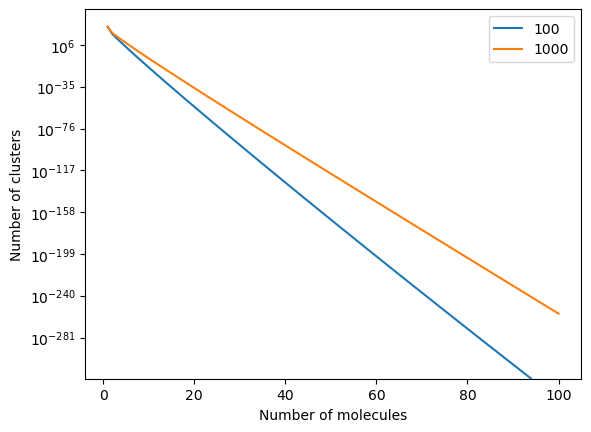

In [8]:
plt.figure()
n = np.linspace(1,100,100)
for i in range(len(time_step_array)):
    plt.plot(x_array[i], y_array[i], label=str(time_step_array[i]))

#plt.plot(n,cluster_physics.number_density_equilibrium(n))
plt.legend()
plt.xlabel("Number of molecules")
plt.ylabel("Number of clusters")
plt.yscale("log")


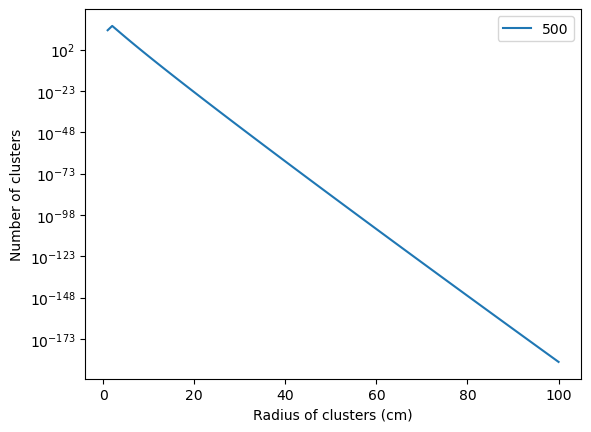

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
for i in range(len(time_step_array)):
    # Convert the keys of the dictionary to a list
    x_values = np.array(list(x_array[i]))
    y_values = np.array(list(y_array[i]))
    radius = ((3 / (4 * np.pi)) * x_values * 4.485 * 1e-23) ** (1/3)
    plt.semilogy(x_values, y_values, label=str(time_step_array[i]))

plt.legend()
plt.xlabel("Radius of clusters (cm)")
plt.ylabel("Number of clusters")
plt.show()
